<a href="https://colab.research.google.com/github/tackulus/204426_PROJECT/blob/main/Sprite_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pokebase

In [17]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pokebase as pb
from tqdm import tqdm

In [55]:
sprite_rgba = []
for i in tqdm(range(1,899)):
    source = pb.SpriteResource('pokemon', i, official_artwork=True)
    binary = source.img_data
    img = plt.imread(io.BytesIO(binary))
    img = np.asarray(img)
    sprite_rgba.append(img)

sprite_rgba = np.asarray(sprite_rgba)
sprite_rgba.shape # pokedex n == index n-1

100%|██████████| 898/898 [00:00<00:00, 1889.84it/s]


(898, 96, 96, 4)

In [67]:
from skimage.color import rgba2rgb

sprite_rgb = [rgba2rgb(img_rgba) for img_rgba in tqdm(sprite_rgba)]
sprite_rgb = np.asarray(sprite_rgb)
sprite_rgb.shape # pokedex n == index n-1

100%|██████████| 898/898 [00:00<00:00, 3860.09it/s]


(898, 96, 96, 3)

In [71]:
from skimage.feature import hog

def feature_extraction_hog(img):
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8,8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd

sprite_hog = [feature_extraction_hog(img_rgb) for img_rgb in tqdm(sprite_rgb)]
sprite_hog = np.asarray(sprite_hog)
sprite_hog.shape # pokedex n == index n-1

100%|██████████| 898/898 [00:26<00:00, 33.73it/s]


(898, 4356)

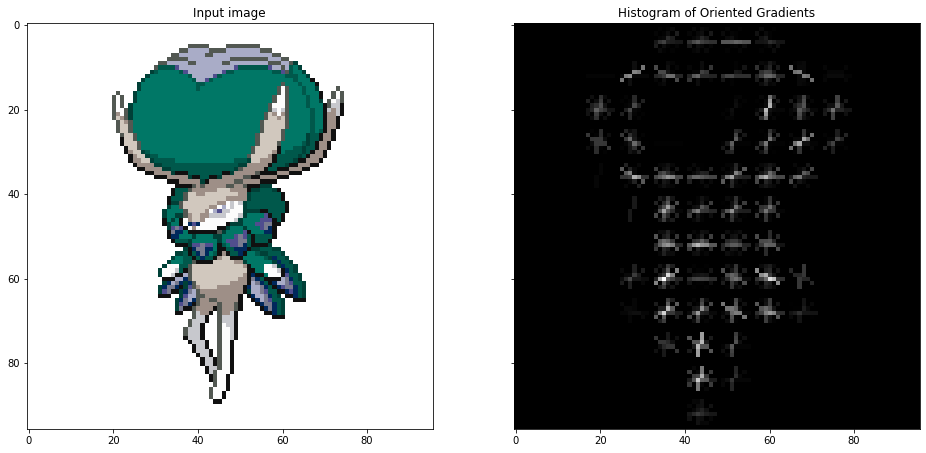

In [66]:
from skimage import exposure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()